## Exercise 6.4 Supervised Machine Learning Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Reflection

## 01 Importing libraries and data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# importing data
path = 'I:/CF/Immersion into Data Analystics/6 Advanced Analytics and Dashboard Design/SteamGames'

In [4]:
df_steam1 = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'gamesc.xlsx'), index_col = [0])

In [5]:
# change display options
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## 02 Data Cleaning

In [6]:
# inspect data
df_steam1.head()

,Name,Release date,release_year,release_month,Estimated owners,Estimated owner level,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Operating Systems,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Avg playtime all,Avg playtime recent,Median playtime all,Median playtime recent,Developer,Publishers,Developer Country,Single-player,Multi-player,Co-op,PVP,Gameplay,VR,MMO,Indie,Early Access,Free to Play,Primary Genre
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1200520,Ascent Free-Roaming VR Experience,2019-12-27,2019,12,0 - 20000,1,0,0,999.00,0,True,False,False,"Windows, Linux",0,0,6,0,0,0,0,0,0,0,Fury Games,Fury Games,United States,1,1,1,0,"Single, Multi, Co-op",0,0,0,0,0,Action
253670,Aartform Curvy 3D 3.0,2013-11-12,2013,11,0 - 20000,1,0,0,299.90,0,True,False,False,"Windows, Linux",0,0,32,13,0,0,150,0,150,0,Aartform,Aartform,Germany,1,0,0,0,Single,0,0,0,0,0,Design
502570,Houdini Indie,2018-10-10,2018,10,0 - 20000,1,59,0,269.99,0,True,True,False,"Windows, Linux",0,0,141,7,0,124,0,0,0,0,SideFX,SideFX,Belgium,0,0,0,0,Unspecified,0,0,0,0,0,Design
1698340,VEGAS 19 Edit - Steam Edition,2021-09-09,2021,9,0 - 20000,1,17,0,249.00,0,True,False,False,"Windows, Linux",0,0,20,8,0,0,0,0,0,0,MAGIX Software GmbH,MAGIX Software GmbH,United Kingdom,0,0,0,0,Unspecified,0,0,0,0,0,Design
438450,3DF Zephyr Lite Steam Edition,2016-02-02,2016,2,0 - 20000,1,4,0,199.99,0,True,False,False,"Windows, Linux",0,0,60,2,0,0,0,0,0,0,3Dflow SRL,3Dflow SRL,Poland,0,0,0,0,Unspecified,0,0,0,0,0,Design


In [7]:
# Check for missing values

df_steam1.isnull().sum()

Name                        0
Release date                0
release_year                0
release_month               0
Estimated owners            0
Estimated owner level       0
Peak CCU                    0
Required age                0
Price                       0
DLC count                   0
Windows                     0
Mac                         0
Linux                       0
Operating Systems           0
Metacritic score            0
User score                  0
Positive                    0
Negative                    0
Achievements                0
Recommendations             0
Avg playtime all            0
Avg playtime recent         0
Median playtime all         0
Median playtime recent      0
Developer                 100
Publishers                320
Developer Country         201
Single-player               0
Multi-player                0
Co-op                       0
PVP                         0
Gameplay                    0
VR                          0
MMO       

#### Missing values are in developer information which is not going to be used here

In [8]:
# checking for duplicates
dups = df_steam1.duplicated()

In [9]:
dups.shape # no duplicates

(62998,)

<AxesSubplot: xlabel='release_year', ylabel='Price'>

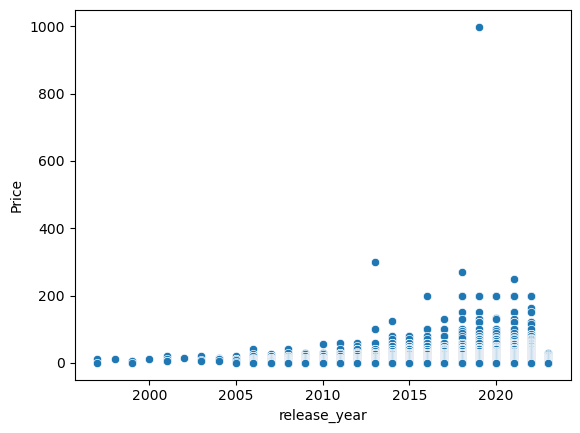

In [10]:
# checking for extreme values
sns.scatterplot(df_steam1, x = 'release_year', y = 'Price')

<AxesSubplot: >

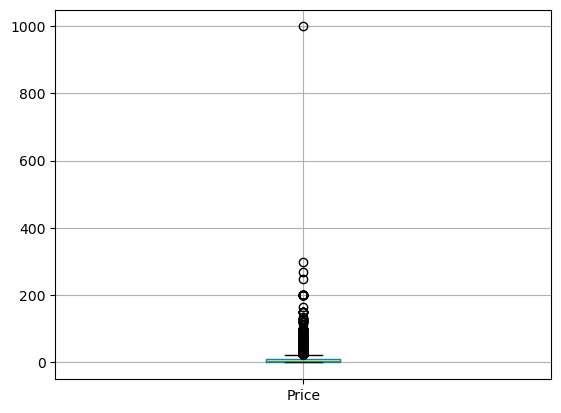

In [11]:
df_steam1.boxplot(column = 'Price')

In [12]:
# removing 'Free to play' games as that appears to skew the data
df_steam1 = df_steam1.query('Price != 0.00')

<AxesSubplot: xlabel='release_year', ylabel='Price'>

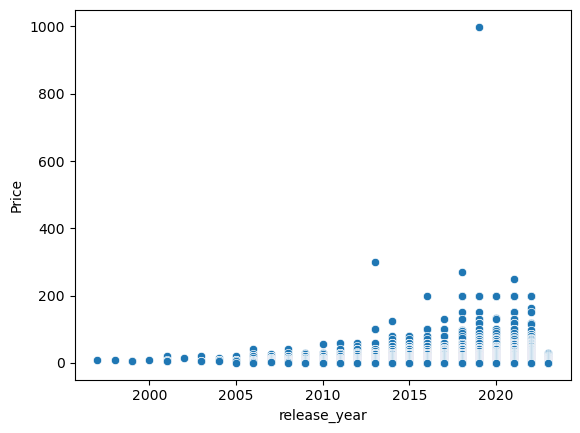

In [13]:
# rechecking for extreme values
sns.scatterplot(df_steam1, x = 'release_year', y = 'Price')

<AxesSubplot: >

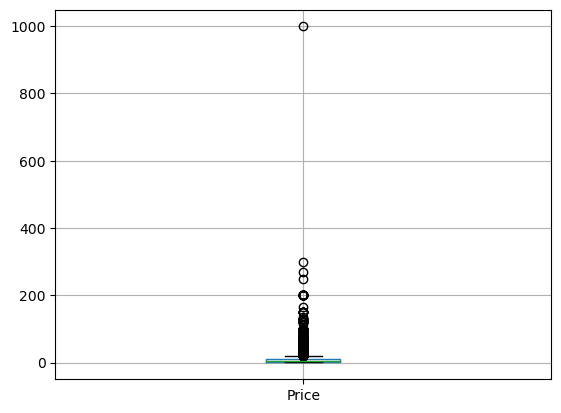

In [14]:
df_steam1.boxplot(column = 'Price')

In [15]:
# removing extreme values, but keeping most outliers as they make up a large portion of the data.
df_steam2 = df_steam1[df_steam1['Price'] <=175] 

In [16]:
# removing year 2023 as it is the current year, in Feb. and therefore not complete
df_steam2 = df_steam2.query('release_year != 2023')

<AxesSubplot: xlabel='release_year', ylabel='Price'>

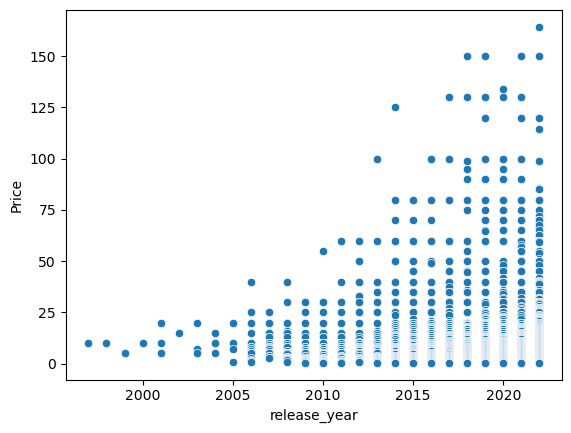

In [17]:
# rechecking new scatter plot
sns.scatterplot(df_steam2, x = 'release_year', y = 'Price')

## 03 Data prep for regression analysis

#### Hypothesis: The maximum price of games will continue to increase over time, but the minimum price of games will also continue to drop. 

In [18]:
# aggregating data by price and year to get mean, min, and max prices for years
df_steam2.groupby('release_year').agg({'Price': ['mean', 'min','max']})

Price               
                   mean    min     max
release_year                          
1997           9.990000   9.99    9.99
1998           9.990000   9.99    9.99
1999           4.990000   4.99    4.99
2000           9.990000   9.99    9.99
2001           9.990000   4.99   19.99
2002          14.990000  14.99   14.99
2003          10.656667   4.99   19.99
2004           9.990000   4.99   14.99
2005           9.656667   0.99   19.99
2006           9.281379   0.99   39.99
2007           8.175393   2.99   24.99
2008           9.680203   0.99   39.99
2009           9.819934   0.51   29.99
2010           8.499922   0.54   54.99
2011           9.663918   0.54   59.99
2012          10.493663   0.99   59.99
2013          11.667896   0.54   99.99
2014           9.790296   0.49  124.99
2015           8.545370   0.49   79.99
2016           8.364495   0.49   99.99
2017           8.010354   0.49  129.99
2018           7.470698   0.49  149.99
2019           8.428086   0.44  149.99
2020           8.498338   0.49  134.10
2021           8.816480   0.49  149.99
2022           9.153158   0.49  164.34

In [19]:
# creating new dataframe to avoid error I kept getting for transforms below
df_steam3 = df_steam2

In [20]:
# Adding max, mean, and min price columns to new dataframe.
df_steam3['max_price'] = df_steam2.groupby(['release_year'])['Price'].transform(np.max)
df_steam3['mean_price'] = df_steam2.groupby(['release_year'])['Price'].transform(np.mean)
df_steam3['min_price'] = df_steam2.groupby(['release_year'])['Price'].transform(np.min)

In [21]:
# checking dataframe
df_steam3.head()

,Name,Release date,release_year,release_month,Estimated owners,Estimated owner level,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Operating Systems,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Avg playtime all,Avg playtime recent,Median playtime all,Median playtime recent,Developer,Publishers,Developer Country,Single-player,Multi-player,Co-op,PVP,Gameplay,VR,MMO,Indie,Early Access,Free to Play,Primary Genre,max_price,mean_price,min_price
AppID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2070990,VEGAS Edit 20 Steam Edition,2022-11-01,2022,11,0 - 20000,1,2,0,164.34,0,True,False,False,"Windows, Linux",0,0,1,0,0,0,0,0,0,0,MAGIX Software GmbH,MAGIX Software GmbH,United States,0,0,0,0,Unspecified,0,0,0,0,0,Design,164.34,9.153158,0.49
873180,é£žè·ƒè·³å°ï¼šå†’é™©ï¼ï¼ï¼ / 1000 Stages :...,2018-07-13,2018,7,0 - 20000,1,0,0,149.99,0,True,False,False,"Windows, Linux",0,0,6,3,6,0,0,0,0,0,ðŸ“šç“œå±±ä¹¦åŠGuashan Bookshop,ðŸ“šç“œå±±ä¹¦åŠGuashan Bookshop,Russia,1,0,0,0,Single,0,0,1,0,0,Adventure,149.99,7.470698,0.49
1176140,MixPad,2019-12-18,2019,12,0 - 20000,1,1,0,149.99,0,True,False,False,"Windows, Linux",0,0,1,0,0,0,0,0,0,0,NCH Software,NCH Software,Russia,0,0,0,0,Unspecified,0,0,0,0,0,Design,149.99,8.428086,0.44
1691000,marriedbook Interactive: Pre-Order ðŸ’,2022-01-12,2022,1,0 - 0,0,0,0,149.99,0,True,False,False,"Windows, Linux",0,0,0,0,0,0,0,0,0,0,marriedbook ðŸ’,Innovative Solutions,Japan,1,1,1,1,"Single, Multi, Co-op, PvP",0,0,0,1,0,Adventure,164.34,9.153158,0.49
1691040,SonicLoop - Realtime VJ content creator for st...,2021-08-27,2021,8,0 - 20000,1,0,0,149.99,0,True,False,False,"Windows, Linux",0,0,0,0,0,0,0,0,0,0,SonicLoop Team,SonicLoop Team,Japan,0,0,0,0,Unspecified,0,0,0,0,0,Design,149.99,8.816480,0.49


In [22]:
# rechecking for null values
df_steam3.isnull().sum()

Name                        0
Release date                0
release_year                0
release_month               0
Estimated owners            0
Estimated owner level       0
Peak CCU                    0
Required age                0
Price                       0
DLC count                   0
Windows                     0
Mac                         0
Linux                       0
Operating Systems           0
Metacritic score            0
User score                  0
Positive                    0
Negative                    0
Achievements                0
Recommendations             0
Avg playtime all            0
Avg playtime recent         0
Median playtime all         0
Median playtime recent      0
Developer                  82
Publishers                238
Developer Country         173
Single-player               0
Multi-player                0
Co-op                       0
PVP                         0
Gameplay                    0
VR                          0
MMO       

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_steam3['release_year'].values.reshape(-1,1)
y = df_steam3['mean_price'].values.reshape(-1,1)

In [24]:
X

array([[2022],
       [2018],
       [2019],
       ...,
       [2022],
       [2022],
       [2019]], dtype=int64)

In [25]:
y

array([[9.15315846],
       [7.47069844],
       [8.42808552],
       ...,
       [9.15315846],
       [9.15315846],
       [8.42808552]])

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04 Regression analysis

In [27]:
# Create a regression object.

regression = LinearRegression()

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

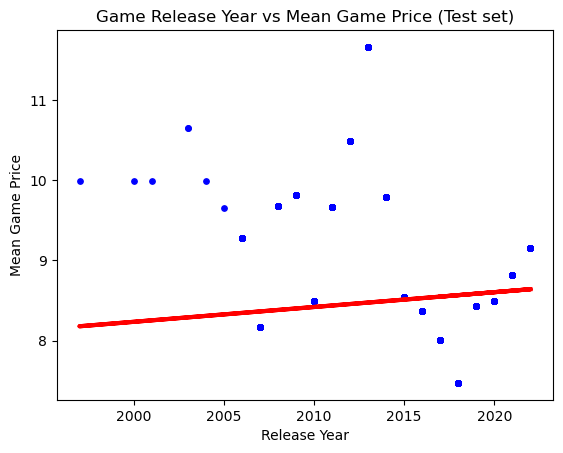

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Game Release Year vs Mean Game Price (Test set)')
plot_test.xlabel('Release Year')
plot_test.ylabel('Mean Game Price')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01851168]]
Mean squared error:  0.390945024341056
R2 score:  0.011261389736900163


In [33]:
y_predicted

array([[8.54863734],
       [8.60417238],
       [8.56714902],
       ...,
       [8.56714902],
       [8.54863734],
       [8.64119575]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8.010354,8.548637
1,8.498338,8.604172
2,7.470698,8.567149
3,8.816480,8.622684
4,8.428086,8.585661
5,8.498338,8.604172
6,8.498338,8.604172
7,8.428086,8.585661
8,9.153158,8.641196
9,9.153158,8.641196


##### Compare how the regression fits the training set

In [35]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01851168]]
Mean squared error:  0.390945024341056
R2 score:  0.011261389736900163


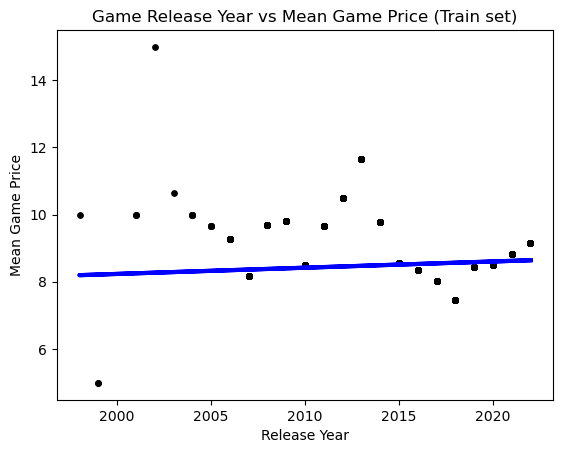

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='black', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Game Release Year vs Mean Game Price (Train set)')
plot_test.xlabel('Release Year')
plot_test.ylabel('Mean Game Price')
plot_test.show()

#### Repeating with maximum prices

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_2 = df_steam3['release_year'].values.reshape(-1,1)
y_2 = df_steam3['max_price'].values.reshape(-1,1)

In [39]:
X_2

array([[2022],
       [2018],
       [2019],
       ...,
       [2022],
       [2022],
       [2019]], dtype=int64)

In [40]:
y_2

array([[164.34],
       [149.99],
       [149.99],
       ...,
       [164.34],
       [164.34],
       [149.99]])

In [41]:
# Split data into a training set and a test set.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict the values of y_2 using X_2.

y_predicted_2 = regression.predict(X_test_2)

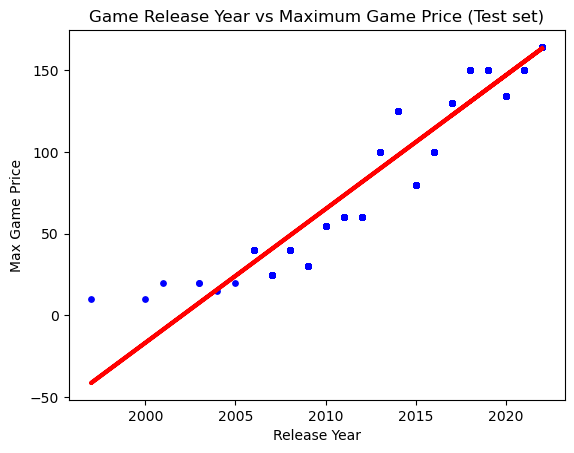

In [44]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='blue', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Game Release Year vs Maximum Game Price (Test set)')
plot_test.xlabel('Release Year')
plot_test.ylabel('Max Game Price')
plot_test.show()

In [45]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.1898278]]
Mean squared error:  163.2864670814811
R2 score:  0.7554904359696933


In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,129.99,122.515174
1,134.10,147.084657
2,149.99,130.705002
3,149.99,155.274485
4,149.99,138.894829
5,134.10,147.084657
6,134.10,147.084657
7,149.99,138.894829
8,164.34,163.464313
9,164.34,163.464313


In [48]:
# Predict.

y_predicted_train_2 = regression.predict(X_train_2)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.1898278]]
Mean squared error:  163.2864670814811
R2 score:  0.7554904359696933


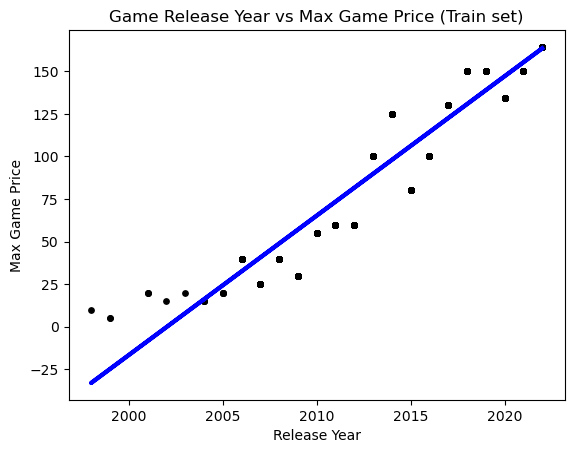

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train_2, y_train_2, color='black', s = 15)
plot_test.plot(X_train_2, y_predicted_train_2, color='blue', linewidth =3)
plot_test.title('Game Release Year vs Max Game Price (Train set)')
plot_test.xlabel('Release Year')
plot_test.ylabel('Max Game Price')
plot_test.show()

#### Repeating for minimum price

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_3 = df_steam3['release_year'].values.reshape(-1,1)
y_3 = df_steam3['min_price'].values.reshape(-1,1)

In [52]:
X_3

array([[2022],
       [2018],
       [2019],
       ...,
       [2022],
       [2022],
       [2019]], dtype=int64)

In [53]:
y_3

array([[0.49],
       [0.49],
       [0.44],
       ...,
       [0.49],
       [0.49],
       [0.44]])

In [54]:
# Split data into a training set and a test set.
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [55]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_3, y_train_3)

LinearRegression()

In [56]:
# Predict the values of y_3 using X_3.

y_predicted_3 = regression.predict(X_test_3)

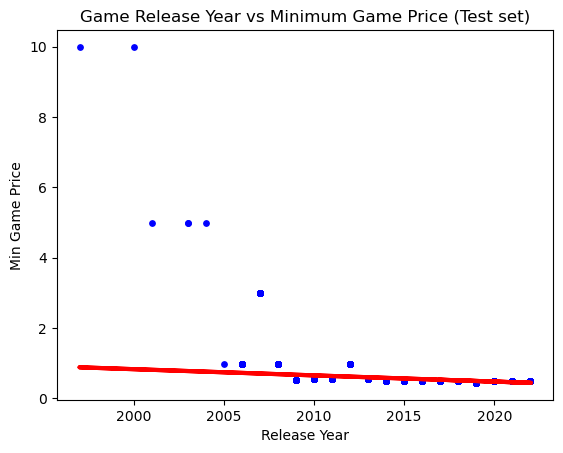

In [57]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='blue', s = 15)
plot_test.plot(X_test_3, y_predicted_3, color='red', linewidth =3)
plot_test.title('Game Release Year vs Minimum Game Price (Test set)')
plot_test.xlabel('Release Year')
plot_test.ylabel('Min Game Price')
plot_test.show()

In [58]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test_3, y_predicted_3)
r2 = r2_score(y_test_3, y_predicted_3)

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0176366]]
Mean squared error:  0.025886790962579096
R2 score:  0.08493845784621956


In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data.head(30)

,Actual,Predicted
0,0.49,0.530828
1,0.49,0.477918
2,0.49,0.513191
3,0.49,0.460281
4,0.44,0.495555
5,0.49,0.477918
6,0.49,0.477918
7,0.44,0.495555
8,0.49,0.442645
9,0.49,0.442645


In [61]:
# Predict.

y_predicted_train_3 = regression.predict(X_train_3)

In [62]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0176366]]
Mean squared error:  0.025886790962579096
R2 score:  0.08493845784621956


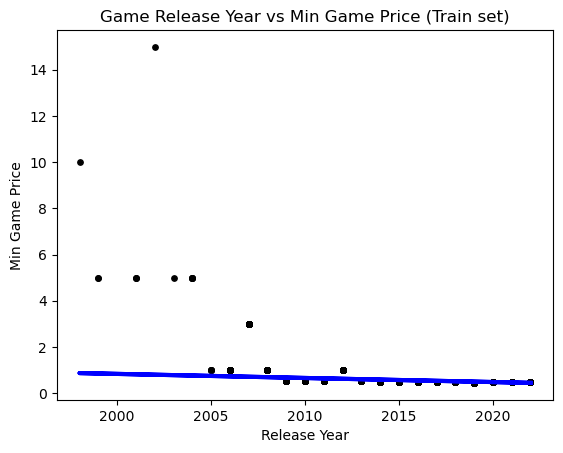

In [63]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train_3, y_train_3, color='black', s = 15)
plot_test.plot(X_train_3, y_predicted_train_3, color='blue', linewidth =3)
plot_test.title('Game Release Year vs Min Game Price (Train set)')
plot_test.xlabel('Release Year')
plot_test.ylabel('Min Game Price')
plot_test.show()

## 05 Reflection

#### The regression analysis was able to predict maximum game prices through time fairly well. However, this did not work well at all with average and minimum game prices. Minimum game price predictions seem to be thrown off due to values prior to 2008; afterwards the prediction appears pretty accurate. There also seems to be some years where the average game price is higher than predicted and other years where average game price was lower than predicted. It does appear that in general, game prices have dropped, since 2005 but after 2008 or so, the price reductions became unpredictable. The prediction for maxiumum game prices is by no means perfect either. While there is a general trend upwards, there are many prices both below and above the prediction line.